# **Brain Tumor Model Creation**

## **Libraries Used**

In [216]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
import cv2

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Rescaling,Conv2D,MaxPooling2D,Flatten,Dense,Dropout 

## **Manual**

### **Train Data**

Train data:

In [217]:
train_data_path = 'train'

Train data classes:

In [218]:
tumor_classes = os.listdir(train_data_path)
train_csv = tumor_classes.pop()
tumor_classes

['glioma', 'meningioma', 'no_tumor', 'pituitary']

Image counts: 

In [219]:
tumor_class = {}
for i in tumor_classes:
    tumor_class[i] = os.path.join(train_data_path,i)
    if os.path.isdir(tumor_class[i]):
        count = len(os.listdir(tumor_class[i]))
        print(f"{i}: {count}")

glioma: 564
meningioma: 358
no_tumor: 335
pituitary: 438


Display image:

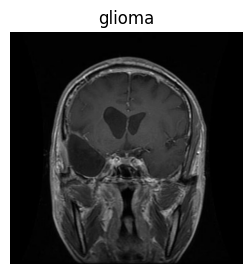

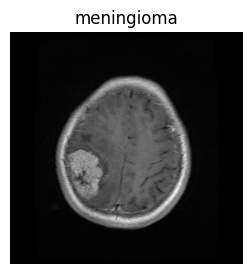

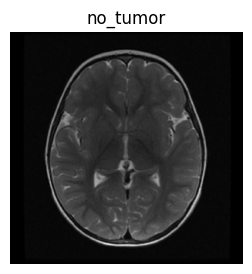

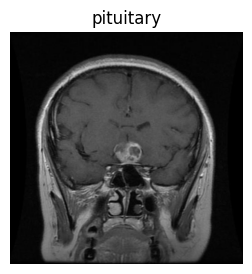

In [220]:
sample_images = {}
for i in tumor_class:
    plt.figure(figsize=(3,5))
    # Image Path
    image_name = os.listdir(tumor_class[i])[0]
    image_path = os.path.join(tumor_class[i],image_name)
    sample_images[i] = image_path
    # Image Display
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(i)
    plt.axis('off')
    plt.show()

Image shapes:

In [221]:
for i in sample_images:
    image = Image.open(sample_images[i])
    print(f"{i}: {image.size}")

glioma: (640, 640)
meningioma: (640, 640)
no_tumor: (640, 640)
pituitary: (640, 640)


### **Train Data Extraction**

Train data path & classes:

In [222]:
train_data_path, tumor_classes

('train', ['glioma', 'meningioma', 'no_tumor', 'pituitary'])

CSV values extraction: 

In [223]:
train_df_dict = []
for i in tumor_classes:
    image_path = os.path.join(train_data_path,i)
    for j in os.listdir(image_path):
        if j.endswith(('.jpg','.png','jpeg')):
            train_df_dict.append({'image_path':j,'labels':i})

train_df_dict[:5]

[{'image_path': 'Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c0133.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0013_jpg.rf.312d7ef8d55655cbf02c4143dfef3788.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0014_jpg.rf.1c9a1de19711c94e45210faa7473b26a.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0015_jpg.rf.13077910f13033d4bbdedda8b91cb48e.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0016_jpg.rf.85a74661631af6d62d25e50e62d34c95.jpg',
  'labels': 'glioma'}]

CSV creation: 

In [224]:
train_df = pd.DataFrame(train_df_dict)
train_df.sample(5)

,image_path,labels
19,Tr-gl_0034_jpg.rf.cb59e948c7609e9fcf692b989365...,glioma
783,Tr-me_0365_jpg.rf.03aded05646c7daf1736c9064be7...,meningioma
1017,Tr-no_0176_jpg.rf.7cf0bfe7a55c3d751f6e373f183c...,no_tumor
443,Tr-gl_0454_jpg.rf.419aefe1ce48688053e1b9bcf33e...,glioma
915,Tr-me_0551_jpg.rf.58c4d99195ebc75bb6af47123a85...,meningioma


CSV save:

In [225]:
train_df.to_csv('tumor_train_data.csv',index=False)

One hot encoding:

In [226]:
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(train_df[['labels']])
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(['labels']))

New DataFrame:

In [227]:
train_df_encoded = train_df.drop(columns=['labels'])
train_df_encoded = train_df_encoded.join(encoded_df)
train_df_encoded

,image_path,labels_glioma,labels_meningioma,labels_no_tumor,labels_pituitary
0,Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c...,1.0,0.0,0.0,0.0
1,Tr-gl_0013_jpg.rf.312d7ef8d55655cbf02c4143dfef...,1.0,0.0,0.0,0.0
2,Tr-gl_0014_jpg.rf.1c9a1de19711c94e45210faa7473...,1.0,0.0,0.0,0.0
3,Tr-gl_0015_jpg.rf.13077910f13033d4bbdedda8b91c...,1.0,0.0,0.0,0.0
4,Tr-gl_0016_jpg.rf.85a74661631af6d62d25e50e62d3...,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1690,Tr-pi_0654_jpg.rf.0641f14effb3dcdd56e1a3ba005f...,0.0,0.0,0.0,1.0
1691,Tr-pi_0655_jpg.rf.35876922f7222b046c82110a1b7e...,0.0,0.0,0.0,1.0
1692,Tr-pi_0656_jpg.rf.ec2bbda460dabe336c1c2d8e619f...,0.0,0.0,0.0,1.0
1693,Tr-pi_0658_jpg.rf.2f3d2f377ddb080346e45db55f4f...,0.0,0.0,0.0,1.0


CSV encoded save:

In [228]:
train_df_encoded.to_csv('tumor_train_data_encoded.csv',index=False)

### **Resize and Normalize**

Train class:

In [229]:
tumor_class

{'glioma': 'train\\glioma',
 'meningioma': 'train\\meningioma',
 'no_tumor': 'train\\no_tumor',
 'pituitary': 'train\\pituitary'}

Resized image:

In [230]:
def resized_data(data_path):
    resized_images = []
    image_labels = []
    tumor_class = os.listdir(data_path)
    for i in tumor_class:
        class_path = os.path.join(data_path,i)
        if os.path.isdir(class_path):
            for j in os.listdir(class_path):
                image_path = os.path.join(class_path,j)
                image = cv2.imread(image_path)
                image = cv2.resize(image,(224,224))
                image = image.astype(float)/225
                resized_images.append(image)
                image_labels.append(i)
    return np.array(resized_images), np.array(image_labels)

### **Data Splitting**

Train data: 

In [231]:
x_train,y_train = resized_data(train_data_path)

Test data:

In [232]:
test_data_path = 'test'
x_test,y_test = resized_data(test_data_path)

### **Data Encoding**

Encoder: 

In [233]:
ohe = OneHotEncoder()

Encoding:

In [234]:
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.fit_transform(y_test.reshape(-1,1))

## **Tensorflow**

Data path: 

In [235]:
train_data_path, test_data_path

('train', 'test')

Train data:

In [236]:
train_data = image_dataset_from_directory(train_data_path, label_mode='int', image_size=(224, 224),shuffle=True)

Found 1695 files belonging to 4 classes.


Test data:

In [237]:
test_data = image_dataset_from_directory(test_data_path, label_mode='int', image_size=(224, 224),shuffle=True)

Found 246 files belonging to 4 classes.


## **Model Building**

Model architecture:

In [238]:
model = Sequential([Input(shape=(224,224,3)),
                    Rescaling(1/255),
                    Conv2D(32,3,activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64,3,activation='relu'),
                    MaxPooling2D(),
                    Conv2D(128,3,activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dropout(0.5),
                    Dense(4,activation='softmax')
                    ])

Model compiler:

In [239]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model summary:

In [240]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)